# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [2]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_others_plus_MGC_remove_delta_d.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_dispersity,hole_mobility,post_process,film_deposition_type_spin,delta_d,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent
0,4.00,299.00,3.32,0.110000,1,1,9.29,0,0,0,0
1,4.00,299.00,3.32,0.290000,1,1,9.29,0,0,1,0
2,4.00,299.00,3.32,0.230000,1,1,9.29,0,0,1,0
3,4.00,299.00,3.32,0.730000,1,1,9.29,0,0,1,0
4,4.00,299.00,3.32,1.860000,1,1,9.29,0,0,1,0
5,4.00,299.00,3.32,0.210000,1,1,9.29,0,0,1,0
6,4.00,299.00,3.32,0.340000,1,1,9.29,0,0,1,0
7,4.00,299.00,3.32,0.240000,1,1,9.29,0,0,1,0
8,4.00,299.00,3.32,1.970000,1,1,9.29,0,0,1,0
9,4.00,299.00,3.32,0.690000,1,1,9.29,0,0,1,0


In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'film_deposition_type_spin',
 'delta_d',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent']

In [4]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
DPPPDTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.510
R² score for test set: 0.210


## Polynomial regression

Degree 1: R² train = 0.510, R² test = 0.210
Degree 2: R² train = 0.455, R² test = -0.953
Degree 3: R² train = 0.830, R² test = 0.344
Degree 4: R² train = 0.830, R² test = 0.160
Degree 5: R² train = 0.830, R² test = -50631852.837
Degree 6: R² train = 0.820, R² test = -40247619358.903


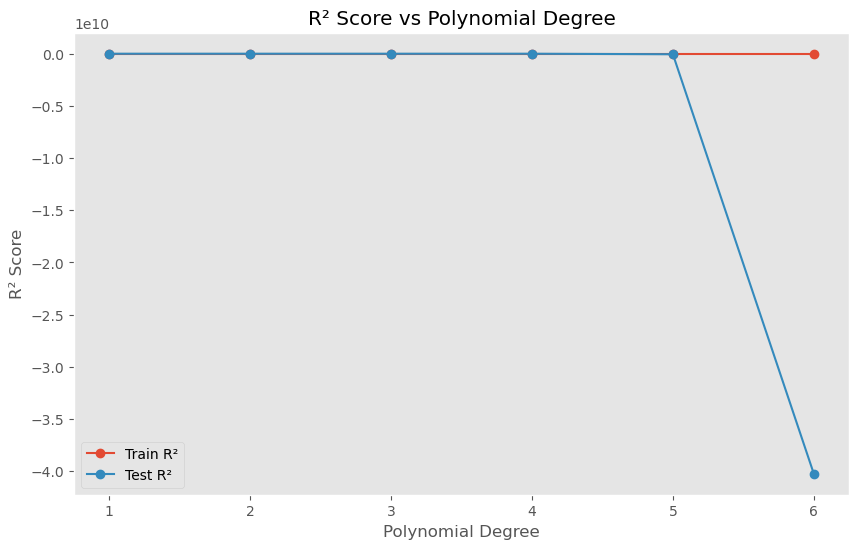

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


## Ridge regression

Alpha 0.1: R² train = 0.510, R² test = 0.213
Alpha 0.2: R² train = 0.510, R² test = 0.216
Alpha 0.3: R² train = 0.510, R² test = 0.218
Alpha 0.4: R² train = 0.509, R² test = 0.220
Alpha 0.5: R² train = 0.509, R² test = 0.222
Alpha 0.6: R² train = 0.509, R² test = 0.223
Alpha 0.7: R² train = 0.509, R² test = 0.224
Alpha 0.8: R² train = 0.508, R² test = 0.225
Alpha 0.9: R² train = 0.508, R² test = 0.226
Alpha 1.0: R² train = 0.508, R² test = 0.226


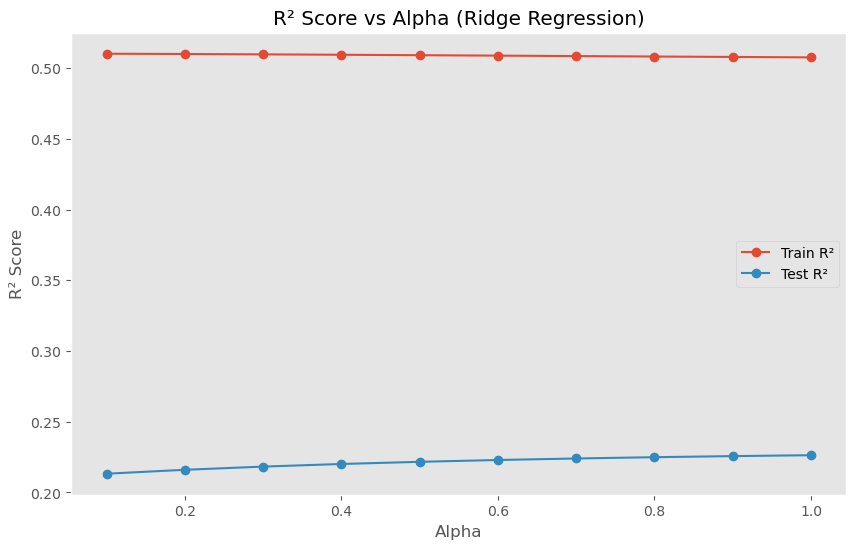

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()


## Lasso regression

Alpha 0.1: R² train = 0.436, R² test = 0.067
Alpha 0.2: R² train = 0.403, R² test = 0.003
Alpha 0.3: R² train = 0.393, R² test = -0.010
Alpha 0.4: R² train = 0.376, R² test = -0.042
Alpha 0.5: R² train = 0.355, R² test = -0.089
Alpha 0.6: R² train = 0.349, R² test = -0.096
Alpha 0.7: R² train = 0.348, R² test = -0.092
Alpha 0.8: R² train = 0.346, R² test = -0.088
Alpha 0.9: R² train = 0.345, R² test = -0.087
Alpha 1.0: R² train = 0.345, R² test = -0.086


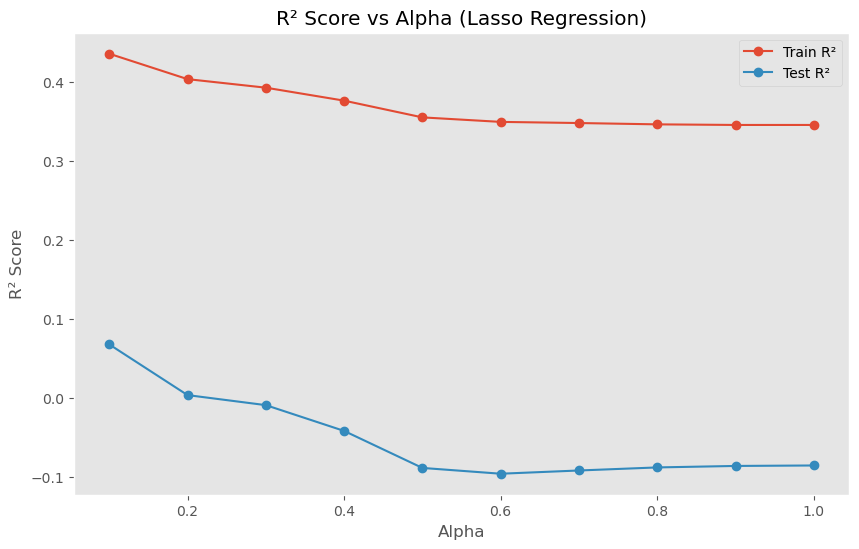

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()


## Elsaticnet regression

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.481447  0.191464
1     0.1       0.2  0.477494  0.182500
2     0.1       0.3  0.473138  0.171619
3     0.1       0.4  0.467795  0.159266
4     0.1       0.5  0.463193  0.147018
5     0.1       0.6  0.458607  0.133515
6     0.1       0.7  0.453081  0.117797
7     0.1       0.8  0.446365  0.099283
8     0.1       0.9  0.441178  0.082492
9     0.1       1.0  0.435687  0.067420
10    0.2       0.1  0.460970  0.140246
11    0.2       0.2  0.452102  0.117038
12    0.2       0.3  0.443485  0.092285
13    0.2       0.4  0.433459  0.065719
14    0.2       0.5  0.425455  0.047415
15    0.2       0.6  0.416029  0.024910
16    0.2       0.7  0.409077  0.010712
17    0.2       0.8  0.405770  0.004865
18    0.2       0.9  0.404689  0.004145
19    0.2       1.0  0.403487  0.003190
20    0.3       0.1  0.445850  0.099470
21    0.3       0.2  0.434321  0.069528
22    0.3       0.3  0.423083  0.045173
23    0.3       0.4  0.412009  0.019045


## Support Vector Regression (SVR)

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train)  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

    C  epsilon  r2_train   r2_test
0   1      0.1  0.450986  0.028593
1   1      0.2  0.458105  0.072518
2   1      0.3  0.462138  0.108258
3   1      0.4  0.461871  0.134125
4   1      0.5  0.460897  0.135053
5   1      0.6  0.465836  0.110075
6   1      0.7  0.465956  0.062747
7   1      0.8  0.462329 -0.007877
8   1      0.9  0.449497 -0.057852
9   1      1.0  0.432387 -0.120273
10  1      1.1  0.403766 -0.179699
11  2      0.1  0.488222 -0.114088
12  2      0.2  0.506147 -0.071895
13  2      0.3  0.516473 -0.062897
14  2      0.4  0.525492 -0.076131
15  2      0.5  0.526471 -0.058449
16  2      0.6  0.521177 -0.045469
17  2      0.7  0.511046 -0.056879
18  2      0.8  0.500332 -0.110439
19  2      0.9  0.485231 -0.173838
20  2      1.0  0.464559 -0.250760
21  2      1.1  0.437263 -0.343572
22  3      0.1  0.498833 -0.225373
23  3      0.2  0.513960 -0.163723
24  3      0.3  0.524413 -0.113961
25  3      0.4  0.529675 -0.076962
26  3      0.5  0.530973 -0.067061
27  3      0.6  0.52

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

## Decision tree regression

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.830
R² score for test set: 0.347


## Random forest regression

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

y_train = y_train.values
y_test = y_test.values

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828503  0.358498
25           350  0.828467  0.358290
27           370  0.828517  0.357040
24           340  0.828424  0.356098
21           310  0.828549  0.355190
28           380  0.828443  0.355186
29           390  0.828372  0.353219
1            110  0.828678  0.353219
23           330  0.828388  0.352811
20           300  0.828579  0.352744


## Gradient bossting regression

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828503  0.358498
25           350  0.828467  0.358290
27           370  0.828517  0.357040
24           340  0.828424  0.356098
21           310  0.828549  0.355190
28           380  0.828443  0.355186
29           390  0.828372  0.353219
1            110  0.828678  0.353219
23           330  0.828388  0.352811
20           300  0.828579  0.352744


## K-nearest Neighbors Regression

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
13           14  0.615921  0.500425
14           15  0.593405  0.496905
15           16  0.562950  0.491166
12           13  0.644264  0.486729
11           12  0.669299  0.458565
10           11  0.691052  0.411082
9            10  0.701236  0.366828
8             9  0.725787  0.292779
7             8  0.729768  0.259250
6             7  0.758208  0.116338


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Train k-NN model
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, Y_train)

# Evaluate baseline performance
baseline_r2 = r2_score(Y_test, knn.predict(X_test))

# Compute permutation importance
perm_importance = permutation_importance(knn, X_test, Y_test, n_repeats=30, random_state=42)

# Display importance scores
importance_df = pd.DataFrame({
    'feature': DPP_DTT_X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

print(importance_df)

NameError: name 'Y_train' is not defined

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
34             100            0.3          3  0.829805  0.348480
1602           200            0.1          3  0.829676  0.348445
2402           250            0.1          3  0.829734  0.348378
3362           310            0.1          3  0.829784  0.348361
1762           210            0.1          3  0.829689  0.348360
3202           300            0.1          3  0.829781  0.348342
962            160            0.1          3  0.829537  0.348316
2082           230            0.1          3  0.829719  0.348305
194            110            0.3          3  0.829814  0.348302
1122           170            0.1          3  0.829583  0.348292


In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
iterations_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
depth_range = range(1, 17)

# Perform grid search over hyperparameters
for iterations in iterations_range:
    for learning_rate in learning_rate_range:
        for depth in depth_range:
            # Train CatBoost Regressor
            model = CatBoostRegressor(
                iterations=iterations,
                learning_rate=learning_rate,
                depth=depth,
                verbose=0,  # Suppress CatBoost output
                random_seed=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'iterations': iterations,
                'learning_rate': learning_rate,
                'depth': depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


AttributeError: 'DataFrame' object has no attribute 'ravel'

## Adaboost regression

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
            model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
            # Train the model
            model.fit(X_train, y_train.ravel())
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
2642           260            0.6          3  0.756008  0.810147
3129           290            0.6         10  0.756008  0.810147
3120           290            0.6          1  0.756008  0.810147
3121           290            0.6          2  0.756008  0.810147
880            150            0.6          1  0.756008  0.810147
881            150            0.6          2  0.756008  0.810147
3122           290            0.6          3  0.756008  0.810147
3123           290            0.6          4  0.756008  0.810147
3124           290            0.6          5  0.756008  0.810147
3125           290            0.6          6  0.756008  0.810147


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.591744
4        film_deposition_type_spin    0.148171
7               insulating_polymer    0.108955
2               polymer_dispersity    0.063386
0           solution_concentration    0.048210
8           substrate_pretreat_sam    0.025842
5                          delta_d    0.013691
3                     post_process    0.000000
6         blend_conjugated_polymer    0.000000
9  solution_treatment_poor_solvent    0.000000


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
DPP_DTT_X

Correlation Matrix:
                                 solution_concentration  polymer_mw  \
solution_concentration                         1.000000   -0.406824   
polymer_mw                                    -0.406824    1.000000   
polymer_dispersity                             0.442676   -0.112855   
post_process                                  -0.290932    0.239916   
film_deposition_type_spin                     -0.296668    0.573155   
delta_d                                        0.387866   -0.578305   
blend_conjugated_polymer                            NaN         NaN   
insulating_polymer                            -0.210391    0.188129   
substrate_pretreat_sam                         0.120164   -0.046837   
solution_treatment_poor_solvent               -0.085141    0.050048   

                                 polymer_dispersity  post_process  \
solution_concentration                     0.442676     -0.290932   
polymer_mw                                -0.112855      0.2

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


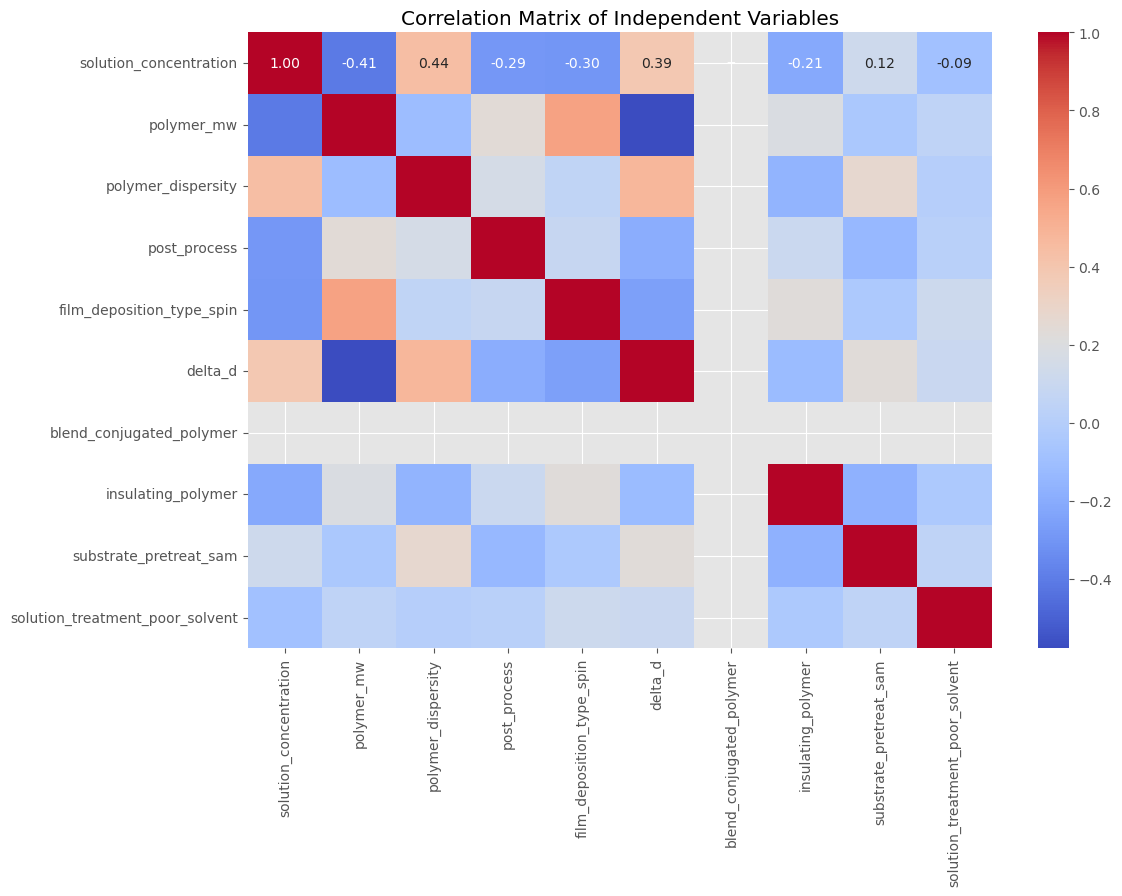

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


IndexError: index 10 is out of bounds for axis 1 with size 10

In [19]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

print("Correlation Matrix:")
correlation_matrix = DPP_DTT_X.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Independent Variables")
plt.show()

vif_data = pd.DataFrame()
vif_data['Feature'] = DPP_DTT_X.columns
vif_data['VIF'] = [
    variance_inflation_factor(DPP_DTT_X, i + 1) for i in range(DPP_DTT_X.shape[1])
]

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = DPP_DTT_X.iloc[train_index], DPP_DTT_X.iloc[test_index]
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores  
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K                                    
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

K-Fold Cross-Validation Results:
    K  Avg Train R²  Avg Test R²
0   2      0.820705     0.698742
1   3      0.779670     0.762472
2   4      0.776695     0.774271
3   5      0.774075     0.706410
4   6      0.776687     0.678243
5   7      0.774436     0.689667
6   8      0.775679     0.711697
7   9      0.773745     0.653289
8  10      0.774632     0.524291


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
